In [18]:
# Importations des bibliotèques
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import tree


In [12]:
# Chargement des données Iris
iris = load_iris()
X, y = iris.data, iris.target

# Création d'un DataFrame pour donner un contexte aux caractéristiques
iris_df = pd.DataFrame(X, columns=iris.feature_names)


#### Question : Calculer les statistiques (moyenne et écart-type) des quatre variables explicatives : longueur de sépale, largueur de sépale, longueur de pétale et largeur de pétale.

In [13]:
# Calcul des statistiques descriptives (moyenne et écart-type)
stats_summary = iris_df.describe().loc[['mean', 'std']]

# Affichage des statistiques
print("Statistiques (moyenne et écart-type) des quatre variables explicatives :\n")
print(stats_summary)

Statistiques (moyenne et écart-type) des quatre variables explicatives :

      sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
mean           5.843333          3.057333           3.758000          1.199333
std            0.828066          0.435866           1.765298          0.762238


#### Question : Combien y a-t-il d’exemples de chaque classe ?

In [15]:
# Trouver combien d'exemples il y a pour chaque classe
classes = np.unique(y)  # Trouve les classes uniques (0, 1, 2)
counts = np.bincount(y)  # Compte combien d'exemples il y a dans chaque classe

# Afficher les résultats
print("Nombre d'exemples par classe :")
for i in range(len(classes)):
    print(f"{iris.target_names[i]} : {counts[i]}")

Nombre d'exemples par classe :
setosa : 50
versicolor : 50
virginica : 50


#### Construction de l'arbre de décisions

[Text(0.4, 0.9, 'x[3] <= 0.75\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.35, 0.8, 'True  '),
 Text(0.5, 0.7, 'x[2] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(0.45, 0.8, '  False'),
 Text(0.2, 0.5, 'x[3] <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.3, 0.3, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'x[2] <= 5.05\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(0.7, 0.3, 'x[1] <= 2.75\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

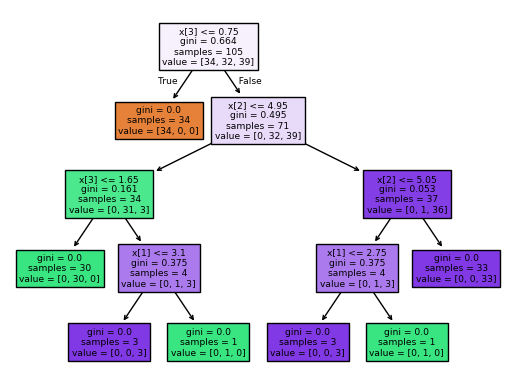

In [23]:
# Division des données en ensembles d'entraînement et de test
# - train_size=0.7 signifie que 70% des données seront utilisées pour l'entraînement
# - random_state=0 fixe l'aléatoire pour garantir des résultats reproductibles
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=0)

# Création d'un classifieur basé sur un arbre de décision
clf = tree.DecisionTreeClassifier()

# Entraînement du classifieur sur les données d'entraînement
# - X_train contient les caractéristiques d'entraînement
# - y_train contient les étiquettes correspondantes
clf.fit(X_train, y_train)

# Visualisation de l'arbre de décision entraîné
# - filled=True remplit les nœuds de couleurs en fonction des classes, ce qui améliore la lisibilité
tree.plot_tree(clf, filled=True)

[Text(0.4, 0.9, 'x[2] <= 2.35\ngini = 0.664\nsamples = 105\nvalue = [34, 32, 39]'),
 Text(0.3, 0.7, 'gini = 0.0\nsamples = 34\nvalue = [34, 0, 0]'),
 Text(0.35, 0.8, 'True  '),
 Text(0.5, 0.7, 'x[2] <= 4.95\ngini = 0.495\nsamples = 71\nvalue = [0, 32, 39]'),
 Text(0.45, 0.8, '  False'),
 Text(0.2, 0.5, 'x[3] <= 1.65\ngini = 0.161\nsamples = 34\nvalue = [0, 31, 3]'),
 Text(0.1, 0.3, 'gini = 0.0\nsamples = 30\nvalue = [0, 30, 0]'),
 Text(0.3, 0.3, 'x[1] <= 3.1\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.2, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.4, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.8, 0.5, 'x[2] <= 5.05\ngini = 0.053\nsamples = 37\nvalue = [0, 1, 36]'),
 Text(0.7, 0.3, 'x[0] <= 6.5\ngini = 0.375\nsamples = 4\nvalue = [0, 1, 3]'),
 Text(0.6, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(0.8, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]'),
 Text(0.9, 0.3, 'gini = 0.0\nsamples = 33\nvalue = [0, 0, 33]')]

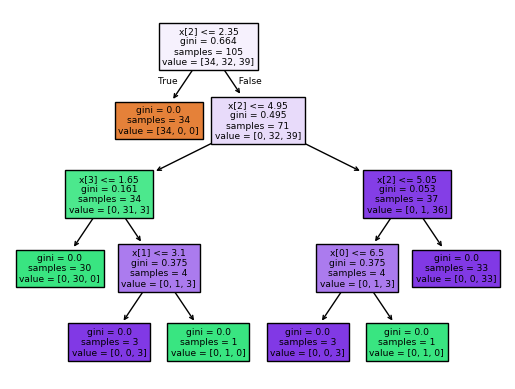